# Analysis of a Combined Cycle Power Plant

<b><font size="4">Introduction</font></b><br>
Predicting electricity output is essential for power plant operators to manage shortfall vs demand. 
In order to run a cost efficient plant, operators need to know the variances during peak and non-peak periods. Power plant generation is dependent on environmental factors such as temperature and humidity among others.

A combined-cycle power plant uses both a gas and a steam turbine together to produce up to 50 percent more electricity from the same fuel than a traditional simple-cycle plant. The waste heat from the gas turbine is routed to the nearby steam turbine, which generates extra power. [1] 

![img](cogeneration.gif)

<b><font size="4">Objective Definition</font></b><br>
Create a model to predict the net hourly electrical energy output using Machine Learning task.<br>


<b><font size="4">Data</font></b><br>
Datasource: University of California, Irvine (UCI) Machine Lerning Repository<br>
http://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant<br>
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. 

Features consist of:
- Ambient Temperature (AT) 
- Ambient Pressure (AP)
- Relative Humidity (RH)
- Exhaust Vacuum (V)
- Power Electricity (PE) This is what we want to predict

<b><font size="4">Tools and software</font></b><br>
Python is used for data analysis and model implementation with Scikit learn library.

In [1]:
#Importing necessary modules and packages
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

First we shall load up our dataset and see what it looks like. 

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Seems like it contains only continuous figures in each of the five variables.
The target column here is PE. The other 4 variables - AT, V, AP, RH will be our predictors. 

Let's get a little bit more information on the variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


As confirmed there were 9568 rows of data points and no missing values were observed. 

Let's get some summary statistics on the data.

In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


From their ranges, nothing seems out of the ordinary, eg ambient temperature falls within normal environmental temperatures (1.8 - 37 degree celsius). Of course we may need to seek subject matter experts to confirm the acceptable ranges, but for now let's assume there are no extreme outliers. 

# Visualize the data

Next, we will visually explore how each of the variables compared to each other using a pairplot.<br>We can do this using pairplot from the seaborn library

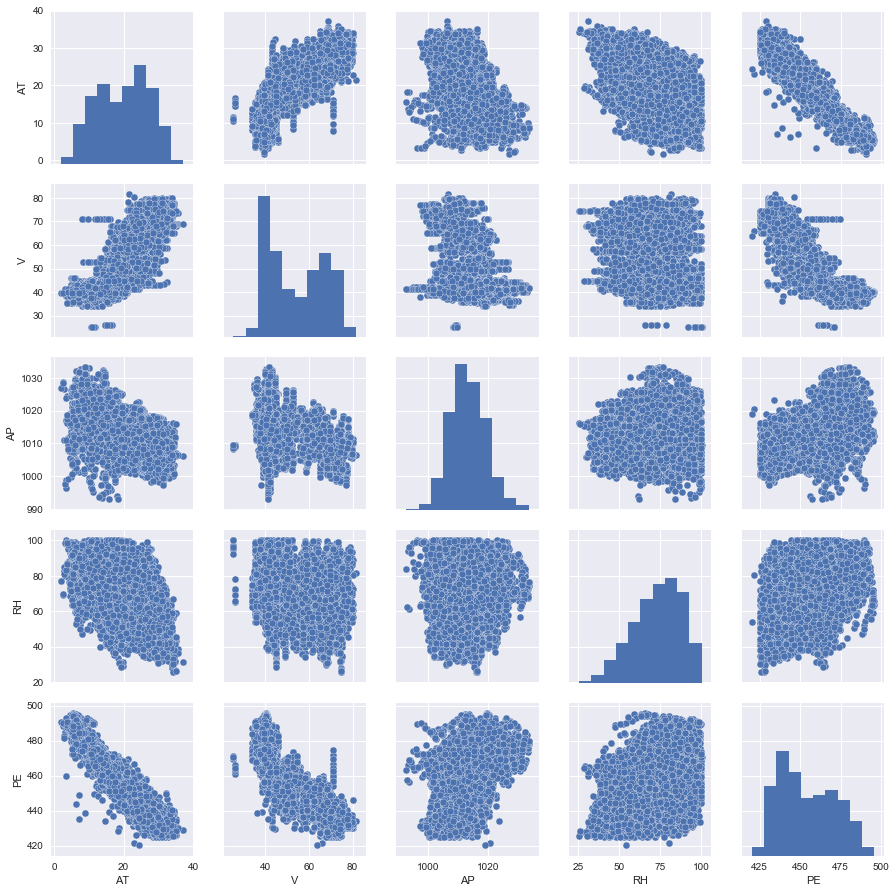

In [5]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
sns.pairplot(df)

From the pairplots, we observed that there is a strong negative linear relationship between AT and PE. This means when ambient temperature increase, electrical output decrease. There also seems to be a negative linear relationship between V, the exhaust vacuum, and PE.


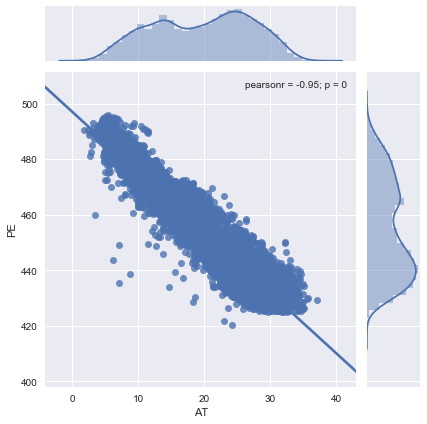

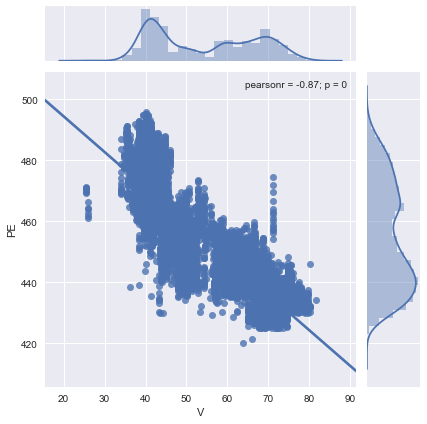

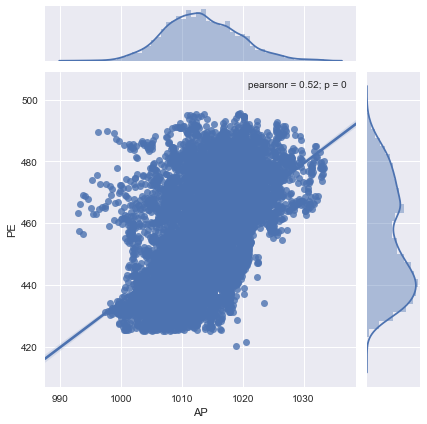

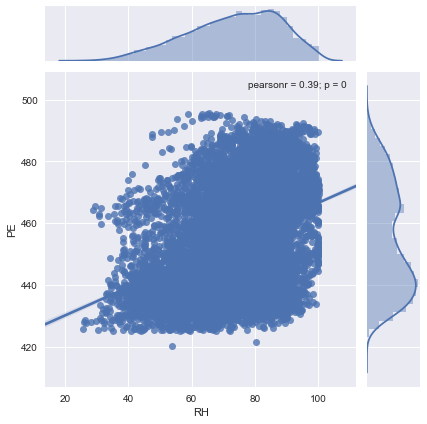

In [6]:
# A closer look of the above observations using a linear fit 
sns.jointplot(x="AT", y="PE", data=df, kind="reg");
sns.jointplot(x="V", y="PE", data=df, kind="reg");
sns.jointplot(x="AP", y="PE", data=df, kind="reg");
sns.jointplot(x="RH", y="PE", data=df, kind="reg");

# Linear Regression

Since the target variable and the independent variables are of continuous type, and there seems to be a linear relationship between the target and independent variables, we will fit a linear regression model and predict the electric energy output. Having more than 1 predictor, this will be a multiple linear regression problem with an equation given as:<br>

Y = b0 + b1X1 + b2X2 + b3X3 + b4X4 <br>

where Y is the Electrical energy ouput, b0 is the Y intercept and b1,b2,b3,b4 are the partial regression coefficients. 

<br>We will be using Scikit Learn library for this task.

In [7]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [8]:
# Create a LinearRegression Object
#lreg = LinearRegression()
lreg = LinearRegression(normalize=True)

We will start by seperating our dataframe into the data columns and the target columns.

Y = electrical energy output (our target output)

X = all the other features (independent variables)

We need to drop PE from the X columns as a predictor.

In [9]:
# Data Columns
X = df.drop('PE',1)

# Target
Y = df.PE

In [10]:
# Finally implement the Linear Regression

lreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [11]:
print ("The estimated intercept coefficient is %.2f" % lreg.intercept_)
print ("The number of coefficients used was %d " % len(lreg.coef_))

The estimated intercept coefficient is 454.61
The number of coefficients used was 4 


Now that we have found the Y intercept of the model to be 454.61 Let's see what are the estimated coefficients for all the other features.

In [12]:
pd.DataFrame(list(lreg.coef_), columns = ['Est. Coefficients'])

,Est. Coefficients
0,-1.977513
1,-0.233916
2,0.062083
3,-0.158054


So our multiple linear regression formula looks like this:

<b>PE = 454.61 − (1.970194 * AT) − (0.234810 * V) + (0.059189 * AP) − (0.157585 * RH)</b>

From what we have visualized earlier, it seems the highest correlation between a feature and electric output was the ambient temperature AT, followed by exhaust vacuum V.

We will also find R-square for this model

In [13]:
# Find the R-square
lreg.score(X,Y)

0.9286960898122536

The R-square is around 0.929. This indicates the 4 features AT, V, AP, RH can explain 93% of the electrical energy output. 

# Predicting PE

Let's try predicting the PE with the formula.<br>


But first, let's <b>split the dataset into training and validation sets</b> so that we can train the model on the training set and see how well it performs on the validation set.<br>

There is a function in Scikit learn that can do this for us called train_test_split(). This will divide the data sets randomly.

In [14]:
# Define the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,df.PE)

# Print shapes of the training and testing data sets
print (X_train.shape) 
print (X_test.shape) 
print (Y_train.shape)
print (Y_test.shape)

(7176, 4)
(2392, 4)
(7176,)
(2392,)


By default the data was splitted into proportions of 75% training and 25% test set. We can adjust this proportion if we want to by inserting a parameter 'test_size=' in the above function. 

In [15]:
# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [16]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Let's calculate the mean squared error (MSE) to see how well our model fits the data.
We want to compare the train set MSE against the test set MSE to see if previously unknown data (test data) are close to the expected outcome. The best model is where the test MSE is minimum.

In [17]:
print ("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print ("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 20.65
Fit a model X_train, and calculate MSE with X_test and Y_test: 21.14


The MSE between the training and testing sets were very close. We can also visualize this by plotting a residual plot.

# Residual Plot
In short the Residual is the difference between the observed value and the predicted value of the dependent variable. If the data points are randomly dispersed around line zero, we know the linear regression is appropraite for the data. 

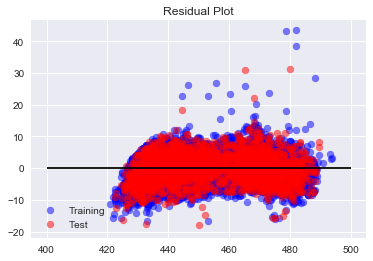

In [18]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=400,xmax=500)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plot')

Looks like the residuals are indeed scattered evenly above and below horizontal line zero. This means there were no discernable patterns that might be of concern with regards to applying a linear regression model to our dataset.

# Conclusion

In conclusion, we can see that our Linear Regression model is a suitable model for predicting the electric output of the power plant. We calculated the R-squared to be around 93%, while the random pattern in the residual plot indicates a good fit for the model.

Source:
<br>[1] https://powergen.gepower.com/resources/knowledge-base/combined-cycle-power-plant-how-it-works.html
<br>[2] Image http://www.mpoweruk.com/gas_turbines.htm

In [19]:
import statsmodels.api as sm
from scipy import stats

C:\Users\Ken Wong\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
# Get p-values for each coefficients. Typically, you use the coefficient p-values to determine 
# which terms to keep in the regression model
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 13 Sep 2017   Prob (F-statistic):               0.00
Time:                        15:29:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0